In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import pandas_gbq
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
sql = """
SELECT *
FROM `consumer_product.up_user_summary_0511`
"""
df = pandas_gbq.read_gbq(sql, project_id='tiki-dwh')
df.head()

Downloading: 100%|██████████| 42215/42215 [00:16<00:00, 2487.88rows/s]


,deviceID,no_of_screen,no_of_session,sum_atc,transportation_cate,beauty_health_cate,home_living_cate,accessories_cate,voucher_cate,electronic_cate,book_cate,phone_tablet_cate,service_cate,lifestyle_cate,phieu_dat_coc_cate,digital_device_cate,sport_cate,cross_border_cate,laptop_cate,camera_cate,mom_baby_cate,recycle_bin_cate,electric_appliances_cate,promotion_cate,sum_cate,reward,fixed_price,by_percent,freegift,cart_fixed,urban_area,sum_search,check_s,seller,price_100000_2000000,price_0_50000,price_200000_500000,price_50000_100000,price_500000_2000000,price_2000000_5000000,price_bigger_5000000,sum_tikinow,avg_review_verified,rating,type_,user_label
0,4636682665238544587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,first_time,0
1,8458625958591689121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,first_time,0
2,4804175510630396798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,first_time,0
3,3600819940233407636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,first_time,0
4,5510559891221180579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,first_time,0


In [4]:
df.dtypes.value_counts()

float64    41
int64       3
object      2
dtype: int64

In [5]:
df.shape

(42215, 46)

<div class="alert alert-block alert-warning">
For tables on BQ, we want to use data as integer type but we forgot to cast them. Therefore, we will convert them to integer columns here.
</div>

In [6]:
# convert object columns
df_converted = df
for column in df_converted.columns:
    if df_converted[column].dtypes == 'object' and column not in ['deviceID', 'type_']:
        df_converted[column] = df[column].astype(float)

df_converted.dtypes.value_counts()

float64    41
int64       3
object      2
dtype: int64

In [8]:
df_converted.describe().round(2)

,no_of_screen,no_of_session,sum_atc,transportation_cate,beauty_health_cate,home_living_cate,accessories_cate,voucher_cate,electronic_cate,book_cate,phone_tablet_cate,service_cate,lifestyle_cate,phieu_dat_coc_cate,digital_device_cate,sport_cate,cross_border_cate,laptop_cate,camera_cate,mom_baby_cate,recycle_bin_cate,electric_appliances_cate,promotion_cate,sum_cate,reward,fixed_price,by_percent,freegift,cart_fixed,urban_area,sum_search,check_s,seller,price_100000_2000000,price_0_50000,price_200000_500000,price_50000_100000,price_500000_2000000,price_2000000_5000000,price_bigger_5000000,sum_tikinow,avg_review_verified,rating,user_label
count,40674.00,40674.00,6267.00,29381.00,29381.00,29381.00,29381.00,29381.00,29381.00,29381.00,29381.00,29381.0,29381.00,29381.0,29381.00,29381.00,29381.00,29381.00,29381.00,29381.00,29381.00,29381.00,29381.0,29381.00,175.0,175.00,175.00,175.0,175.00,42215.00,42215.00,29313.00,29313.00,29381.00,29381.00,29381.00,29381.00,29381.00,29381.00,29381.00,8813.00,27536.00,27536.00,42215.00
mean,6.10,1.34,1.95,0.17,0.37,0.48,0.11,0.03,0.10,0.51,0.34,0.0,1.43,0.0,0.59,0.22,0.39,0.11,0.07,0.20,0.00,0.11,0.0,5.22,0.0,0.02,2.48,0.0,1.11,0.57,2.61,1.01,0.39,1.35,0.53,1.01,1.01,0.66,0.31,0.36,6.52,23.62,1.62,0.28
std,5.67,0.78,3.54,1.18,1.91,2.43,1.04,0.37,0.87,2.50,1.69,0.0,4.74,0.0,2.19,1.53,1.50,0.83,0.58,1.57,0.04,0.79,0.0,8.05,0.0,0.21,3.13,0.0,2.65,0.50,3.35,2.47,0.49,3.16,1.80,2.43,2.48,2.02,1.22,1.52,17.67,87.82,1.72,0.45
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
25%,3.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.00,0.0,0.00,0.00,0.0,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
50%,5.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,3.00,0.0,0.00,2.00,0.0,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00,1.09,0.00
75%,7.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,6.00,0.0,0.00,3.00,0.0,1.00,1.00,3.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,5.00,12.50,3.04,1.00
max,188.00,23.00,114.00,48.00,81.00,119.00,89.00,36.00,34.00,81.00,81.00,0.0,172.00,0.0,61.00,110.00,46.00,34.00,35.00,125.00,5.00,32.00,0.0,172.00,0.0,2.00,16.00,0.0,14.00,1.00,85.00,73.00,1.00,101.00,66.00,76.00,74.00,82.00,35.00,67.00,436.00,3182.00,5.00,1.00


### Handling null values

In [9]:
# check null values on each column
missing = df_converted.isnull().sum()
null_percent = (missing/df_converted.isnull().count())
null_percent = null_percent.map(lambda n: '{:,.2%}'.format(n))
missing_table = pd.concat([missing, null_percent], axis=1, keys=['null_quant', 'null_percent'])
missing_table.sort_values(by='null_percent', ascending=False)


,null_quant,null_percent
reward,42040,99.59%
fixed_price,42040,99.59%
by_percent,42040,99.59%
freegift,42040,99.59%
cart_fixed,42040,99.59%
sum_atc,35948,85.15%
sum_tikinow,33402,79.12%
avg_review_verified,14679,34.77%
rating,14679,34.77%
check_s,12902,30.56%


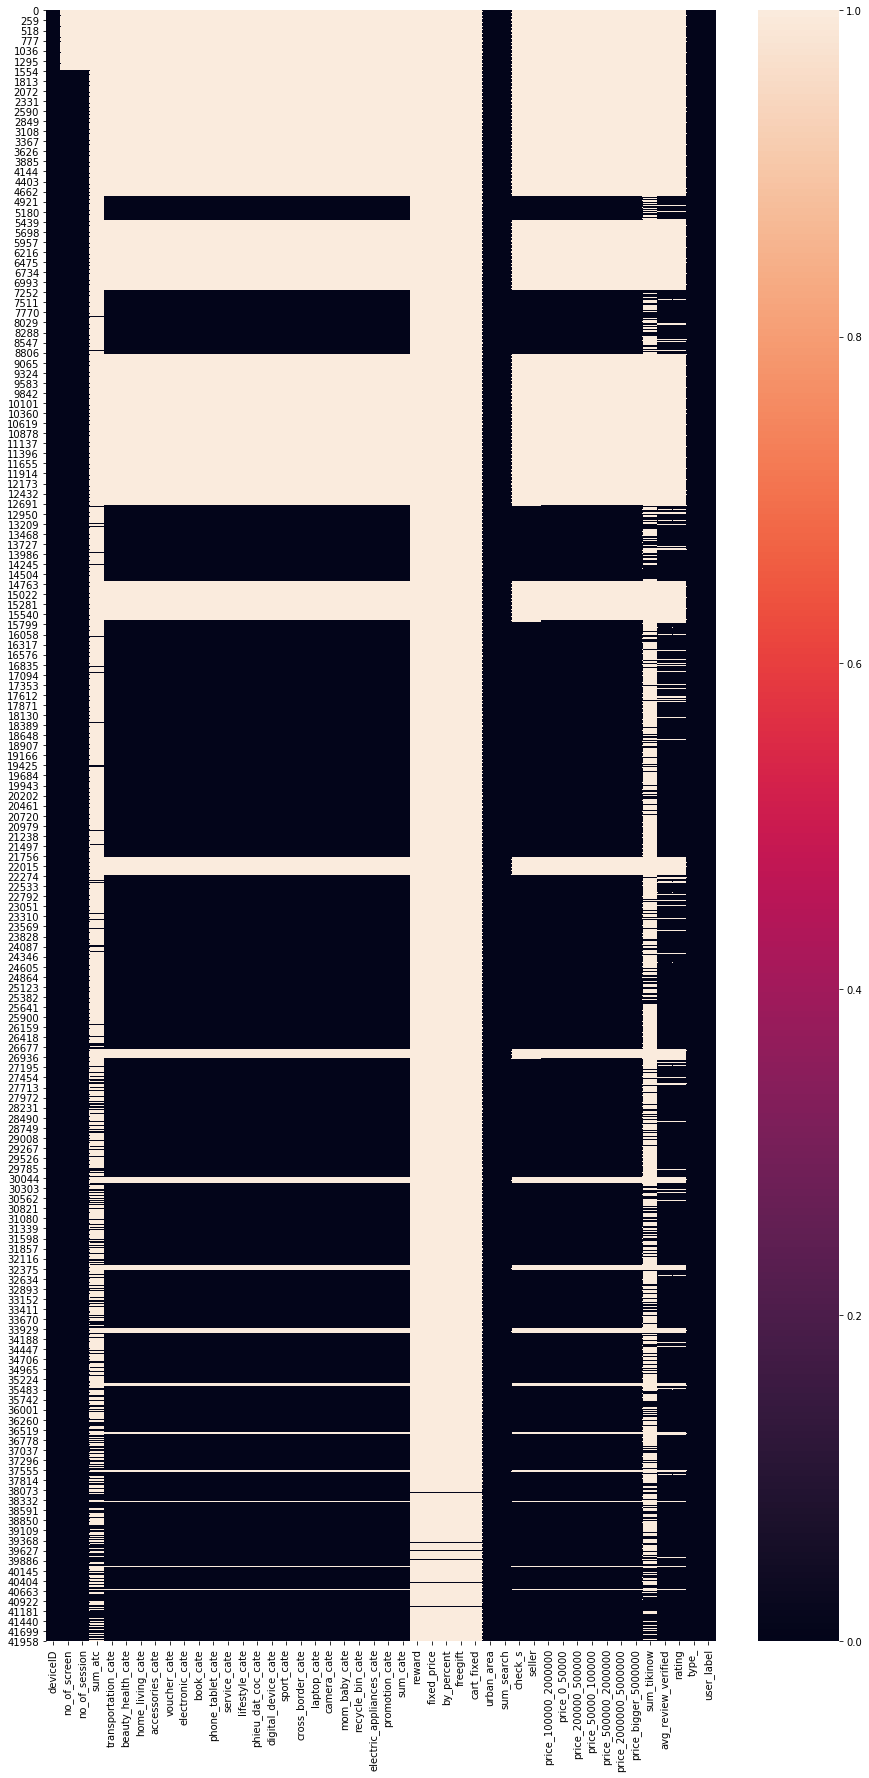

In [10]:
# visualize null value for each feature
plt.figure(figsize=(15,30))
sns.heatmap(df_converted.isnull())

*Solution for null value:*
- For columns with approximately 100% null value, we will drop them. We just keep by_percent, cart_fixed
- Regarding add to cart, though the number of null value is also too high(84%), it does make sense basing on bussiness reality that is add to cart is a rare action for new customer on the first day of accessing Tiki.
- In terms of PDP view with TikiNow badge, its null value also accounts for ~80%. Not sure whether this data is reasonable or not because I don't have enough observation for this field. Hence, I will keep it.
-> null values of 2 above columns will be converted into 0.


In [11]:
# drop columns
df_converted.drop(columns=['reward', 'fixed_price', 'freegift'], inplace=True)
df_converted.drop(columns=['phieu_dat_coc_cate'], inplace=True)
df_converted.columns.to_frame()

,0
deviceID,deviceID
no_of_screen,no_of_screen
no_of_session,no_of_session
sum_atc,sum_atc
transportation_cate,transportation_cate
beauty_health_cate,beauty_health_cate
home_living_cate,home_living_cate
accessories_cate,accessories_cate
voucher_cate,voucher_cate
electronic_cate,electronic_cate


In [12]:
# convert null to 0
df_converted.fillna(0, inplace=True)
df_converted.isnull().sum().to_frame()

,0
deviceID,0
no_of_screen,0
no_of_session,0
sum_atc,0
transportation_cate,0
beauty_health_cate,0
home_living_cate,0
accessories_cate,0
voucher_cate,0
electronic_cate,0


__So far, we've finished handling missing value of this dataset__

### Handling outliers

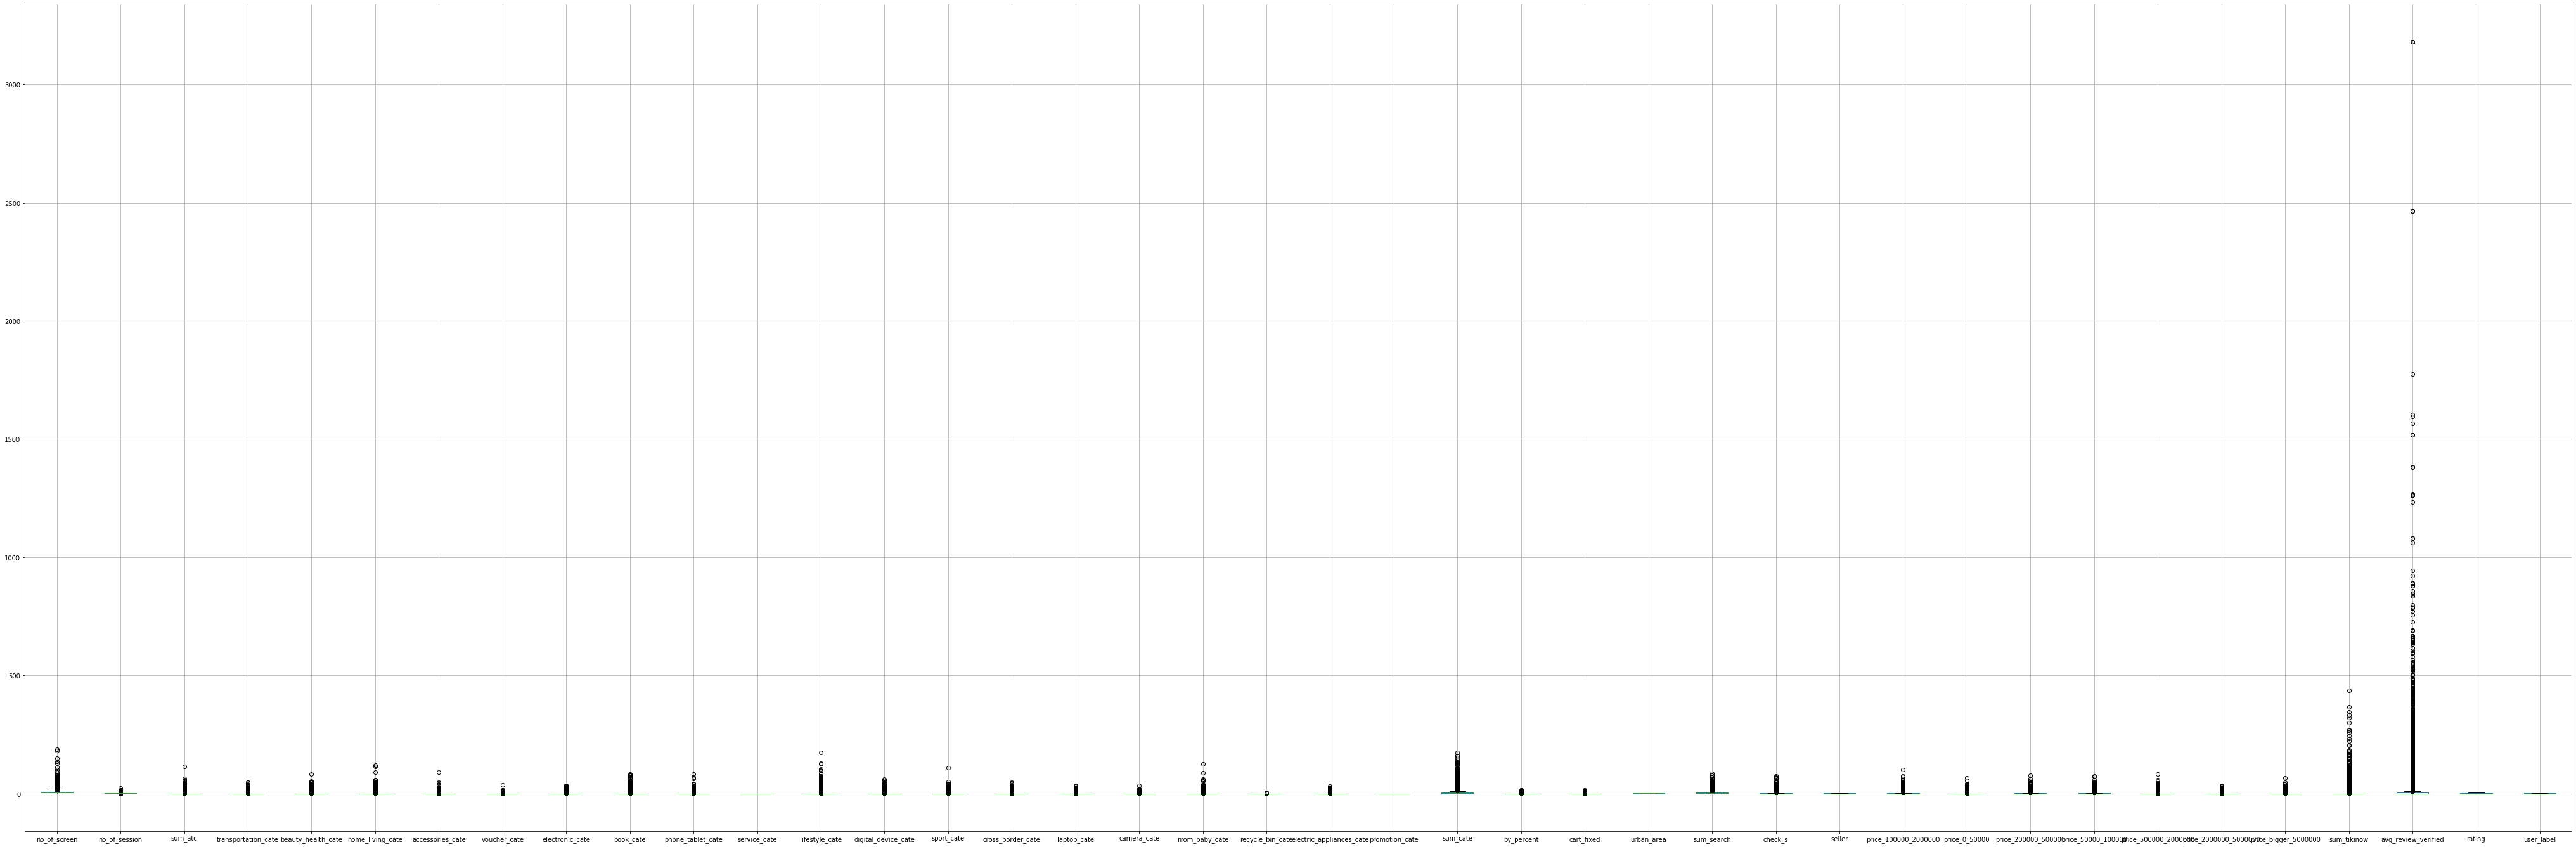

In [13]:
# visualize outliers
plt.figure(figsize=(72, 24))
df_converted.boxplot()

In [14]:
# calculate quantity of outpiers per column
num_col = df_converted.columns[df.dtypes != object]
z_table = {}
for col in num_col:
    z_table[col] = len(df_converted[np.abs(stats.zscore(df_converted[col])) > 3])
pd.DataFrame.from_dict(z_table, orient='index', columns=['outliers']).sort_values(by=['outliers'], ascending=False)

/Users/lap01227/opt/anaconda3/envs/jubook/lib/python3.6/site-packages/scipy/stats/stats.py:2315: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/Users/lap01227/opt/anaconda3/envs/jubook/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


,outliers
no_of_session,995
sum_search,905
price_200000_500000,800
digital_device_cate,781
sum_cate,754
price_0_50000,722
price_100000_2000000,673
no_of_screen,656
lifestyle_cate,650
price_50000_100000,644


In [15]:
# check samples of outliers
outlier = pd.DataFrame()
for col in num_col:
    outlier[col] = np.abs(stats.zscore(df_converted[col]))
outlier[outlier['sum_search'] > 3]

,no_of_screen,no_of_session,sum_atc,transportation_cate,beauty_health_cate,home_living_cate,accessories_cate,voucher_cate,electronic_cate,book_cate,phone_tablet_cate,service_cate,lifestyle_cate,digital_device_cate,sport_cate,cross_border_cate,laptop_cate,camera_cate,mom_baby_cate,recycle_bin_cate,electric_appliances_cate,promotion_cate,sum_cate,by_percent,cart_fixed,urban_area,sum_search,check_s,seller,price_100000_2000000,price_0_50000,price_200000_500000,price_50000_100000,price_500000_2000000,price_2000000_5000000,price_bigger_5000000,sum_tikinow,avg_review_verified,rating,user_label
9632,0.506643,2.122958,0.189308,0.121049,0.158806,0.163634,0.085048,0.076534,0.091339,0.170529,0.164432,NaN,0.248251,0.222261,0.118278,0.214852,0.112203,0.095519,0.104652,0.01215,0.114522,NaN,0.509317,0.040109,0.025044,0.871435,6.377121,0.333971,0.612878,0.346345,0.239762,0.336779,0.331837,0.266873,0.210178,0.198807,0.160204,0.214556,0.664869,0.624079
9740,0.506643,0.354839,0.189308,0.121049,0.158806,0.163634,0.085048,0.076534,0.091339,0.170529,0.164432,NaN,0.248251,0.222261,0.118278,0.214852,0.112203,0.095519,0.104652,0.01215,0.114522,NaN,0.509317,0.040109,0.025044,0.871435,3.395313,0.333971,0.612878,0.346345,0.239762,0.336779,0.331837,0.266873,0.210178,0.198807,0.160204,0.214556,0.664869,1.602362
10089,0.506643,0.354839,0.189308,0.121049,0.158806,0.163634,0.085048,0.076534,0.091339,0.170529,0.164432,NaN,0.248251,0.222261,0.118278,0.214852,0.112203,0.095519,0.104652,0.01215,0.114522,NaN,0.509317,0.040109,0.025044,0.871435,6.078940,0.333971,0.612878,0.346345,0.239762,0.336779,0.331837,0.266873,0.210178,0.198807,0.160204,0.214556,0.664869,0.624079
10363,0.506643,0.884060,0.189308,0.121049,0.158806,0.163634,0.085048,0.076534,0.091339,0.170529,0.164432,NaN,0.248251,0.222261,0.118278,0.214852,0.112203,0.095519,0.104652,0.01215,0.114522,NaN,0.509317,0.040109,0.025044,1.147533,3.097132,0.333971,0.612878,0.346345,0.239762,0.336779,0.331837,0.266873,0.210178,0.198807,0.160204,0.214556,0.664869,0.624079
10750,0.506643,0.354839,0.189308,0.121049,0.158806,0.163634,0.085048,0.076534,0.091339,0.170529,0.164432,NaN,0.248251,0.222261,0.118278,0.214852,0.112203,0.095519,0.104652,0.01215,0.114522,NaN,0.509317,0.040109,0.025044,1.147533,4.289855,0.333971,0.612878,0.346345,0.239762,0.336779,0.331837,0.266873,0.210178,0.198807,0.160204,0.214556,0.664869,0.624079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42082,5.302900,0.884060,0.189308,0.121049,3.591327,7.182997,0.085048,0.076534,0.091339,0.170529,0.164432,NaN,0.248251,7.361936,0.118278,2.150404,0.112203,0.095519,0.104652,0.01215,1.389690,NaN,4.961664,0.040109,0.025044,0.871435,3.693494,2.039211,1.631647,4.822677,2.384099,2.063952,5.336937,2.069029,0.210178,0.198807,4.429584,0.139751,0.482242,0.624079
42088,5.478947,2.122958,1.119401,15.027432,0.158806,0.163634,0.085048,0.076534,0.091339,0.170529,0.164432,NaN,0.248251,0.222261,0.118278,0.214852,0.112203,0.095519,0.104652,0.01215,0.114522,NaN,1.594907,0.040109,0.025044,1.147533,3.097132,0.333971,0.612878,3.345813,0.239762,0.143367,0.612959,0.266873,0.210178,1.366403,6.194887,0.192277,0.148215,1.602362
42105,5.654994,2.122958,9.626011,0.121049,0.158806,0.163634,0.085048,0.076534,1.289712,0.170529,47.776074,NaN,0.248251,0.222261,0.118278,0.214852,0.112203,0.095519,0.104652,0.01215,0.114522,NaN,9.170112,0.040109,0.025044,0.871435,4.588036,23.397853,1.631647,0.346345,0.239762,0.336779,0.331837,0.317102,0.761104,52.235731,2.311220,0.160455,0.618634,1.602362
42130,6.359181,3.361857,4.391174,0.121049,0.466216,0.163634,0.085048,3.116047,0.091339,0.170529,0.164432,NaN,0.248251,0.319468,14.739849,12.399844,0.112203,0.095519,0.104652,0.01215,1.389690,NaN,4.961664,0.040109,0.025044,0.871435,4.588036,0.333971,0.612878,4.084245,4.351994,0.336779,8.643721,0.266873,0.761104,0.198807,3.723463,0.336341,0.006264,1.602362


In [16]:
# remove outliers
df_temp = df_converted.drop(index=outlier[outlier.values > 3].index)
df_temp

/Users/lap01227/opt/anaconda3/envs/jubook/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


,deviceID,no_of_screen,no_of_session,sum_atc,transportation_cate,beauty_health_cate,home_living_cate,accessories_cate,voucher_cate,electronic_cate,book_cate,phone_tablet_cate,service_cate,lifestyle_cate,digital_device_cate,sport_cate,cross_border_cate,laptop_cate,camera_cate,mom_baby_cate,recycle_bin_cate,electric_appliances_cate,promotion_cate,sum_cate,by_percent,cart_fixed,urban_area,sum_search,check_s,seller,price_100000_2000000,price_0_50000,price_200000_500000,price_50000_100000,price_500000_2000000,price_2000000_5000000,price_bigger_5000000,sum_tikinow,avg_review_verified,rating,type_,user_label
0,4636682665238544587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,first_time,0
1,8458625958591689121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,first_time,0
2,4804175510630396798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,first_time,0
3,3600819940233407636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,first_time,0
4,5510559891221180579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,first_time,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41498,A12A1D24C9274CE9AC4FF92B184DD08C,22.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,1,3,2.0,1.0,3.0,0.0,2.0,5.0,0.0,0.0,1.0,7.0,151.300000,2.224836,first_time,1
41501,9C406CDDBD2B4E9E8EC38AAEBDBBBD5F,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0,2,0.0,0.0,4.0,0.0,4.0,1.0,2.0,1.0,0.0,0.0,65.750000,1.019056,first_time,0
41502,5163130374510926078,22.0,3.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,1,2,2.0,1.0,1.0,4.0,2.0,3.0,0.0,2.0,0.0,7.0,3.545455,2.207973,first_time,0
41504,715891816259456735,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,1,1,0.0,0.0,7.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.000000,0.083333,first_time,0


In [17]:
df_temp['user_label'].value_counts()

0    25544
1     8312
Name: user_label, dtype: int64

The proportion of _comeback_ and _not comeback_ value now is ~7/3

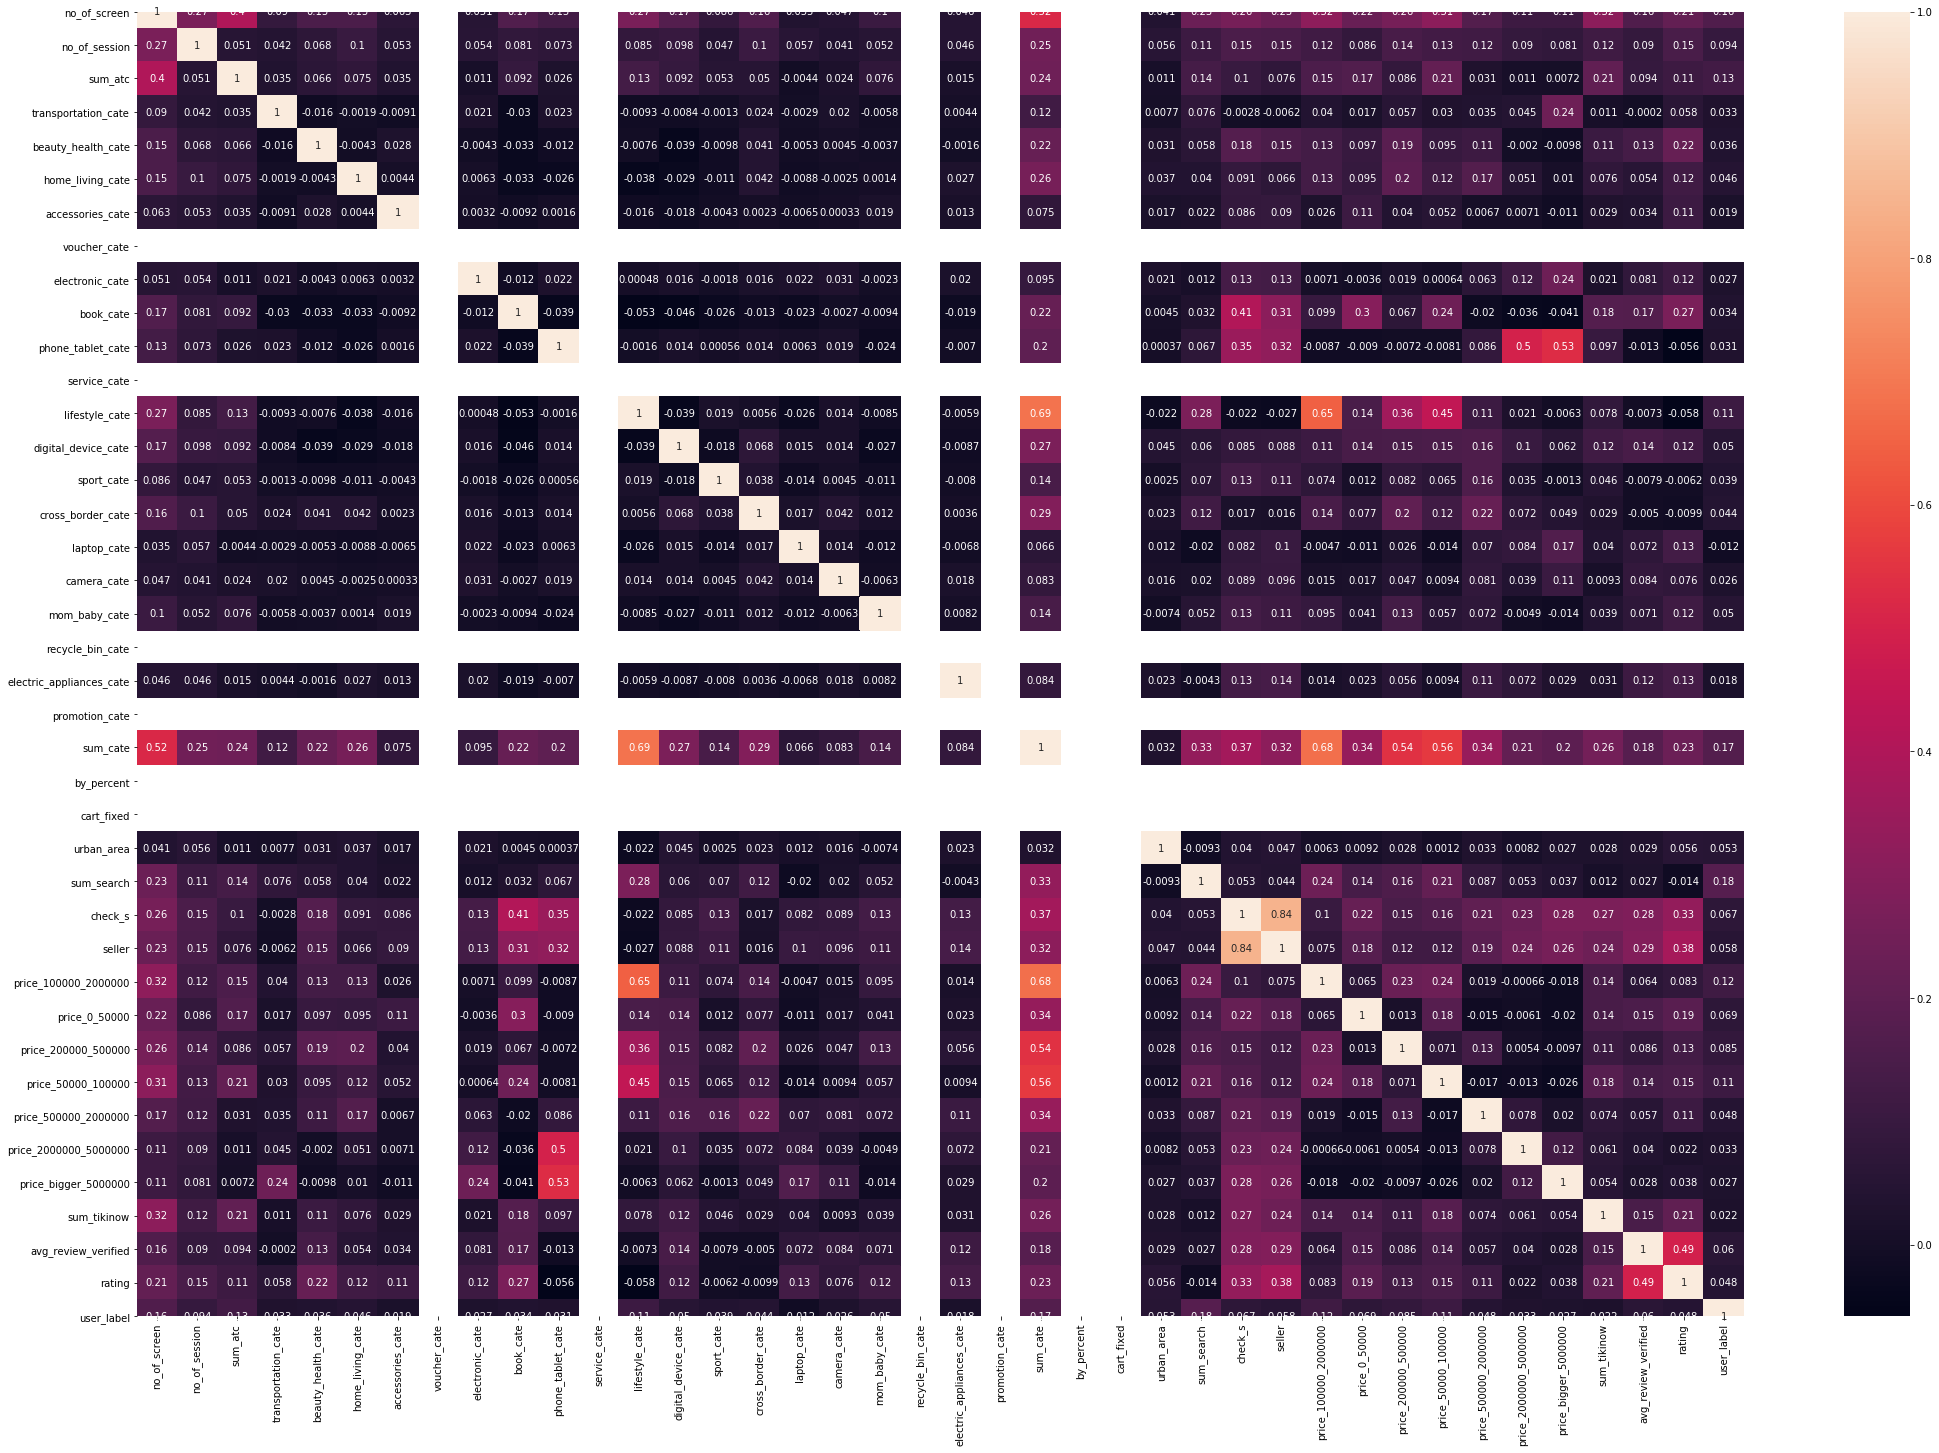

In [18]:
# visualize correlation
corr = df_temp.corr()
plt.figure(figsize=(36,24))
sns.heatmap(corr, annot=True)

No big problem with correlation between features.

In [19]:
dataset =['df_converted', 'df_temp']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [21]:
# handling categorical columns
df_converted['type_'] = LabelEncoder().fit_transform(df_converted['type_'])
df_temp['type_'] = LabelEncoder().fit_transform(df_temp['type_'])

In [22]:
# add feature
df_converted['TT_ratio'] = df_converted['check_s']/df_converted['sum_cate']
df_converted['TT_ratio'].fillna(0, inplace=True)
df_temp['TT_ratio'] = df_temp['check_s']/df_temp['sum_cate']
df_temp['TT_ratio'].fillna(0, inplace=True)

In [23]:
# eliminate deviceID from model
df_converted.set_index('deviceID', inplace=True)
df_temp.set_index('deviceID', inplace=True)

In [25]:
import pickle
loaded_model = pickle.load(open('customer_segmentation_model.sav', 'rb'))
loaded_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [35]:
t = loaded_model.predict(df_temp.drop(columns=['user_label']))

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(df_temp['user_label'], t)

0.7554052457466919

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
# from scikitplot import plot_confusion_matrix
print(classification_report(df_temp['user_label'], t))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85     25544
           1       0.50      0.24      0.32      8312

    accuracy                           0.76     33856
   macro avg       0.65      0.58      0.59     33856
weighted avg       0.72      0.76      0.72     33856



In [23]:
# split data into train and test set
con_X_train, con_X_test, con_y_train, con_y_test = train_test_split(
    df_converted.drop(columns=['user_label']), df_converted['user_label'], test_size=0.2, random_state=16)
temp_X_train, temp_X_test, temp_y_train, temp_y_test = train_test_split(
    df_temp.drop(columns=['user_label']), df_temp['user_label'], test_size=0.2, random_state=8)

In [24]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data

/Users/lap01227/opt/anaconda3/envs/jubook/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [25]:
# initiate model
dt = DecisionTreeClassifier()
xgb = XGBClassifier()
lr = LogisticRegression()

In [26]:
# dataset with outliers | use XGB
xgb.fit(con_X_train, con_y_train)
x_con_y_pred = xgb.predict(con_X_test)
accuracy_score(con_y_test, x_con_y_pred)

0.7364680800663271

In [27]:
# dataset without outliers | use XGB
xgb_model = xgb.fit(temp_X_train, temp_y_train)
x_tmp_y_pred = xgb.predict(temp_X_test)
acc_score = accuracy_score(temp_y_test, x_tmp_y_pred)
acc_score

0.756497341996456

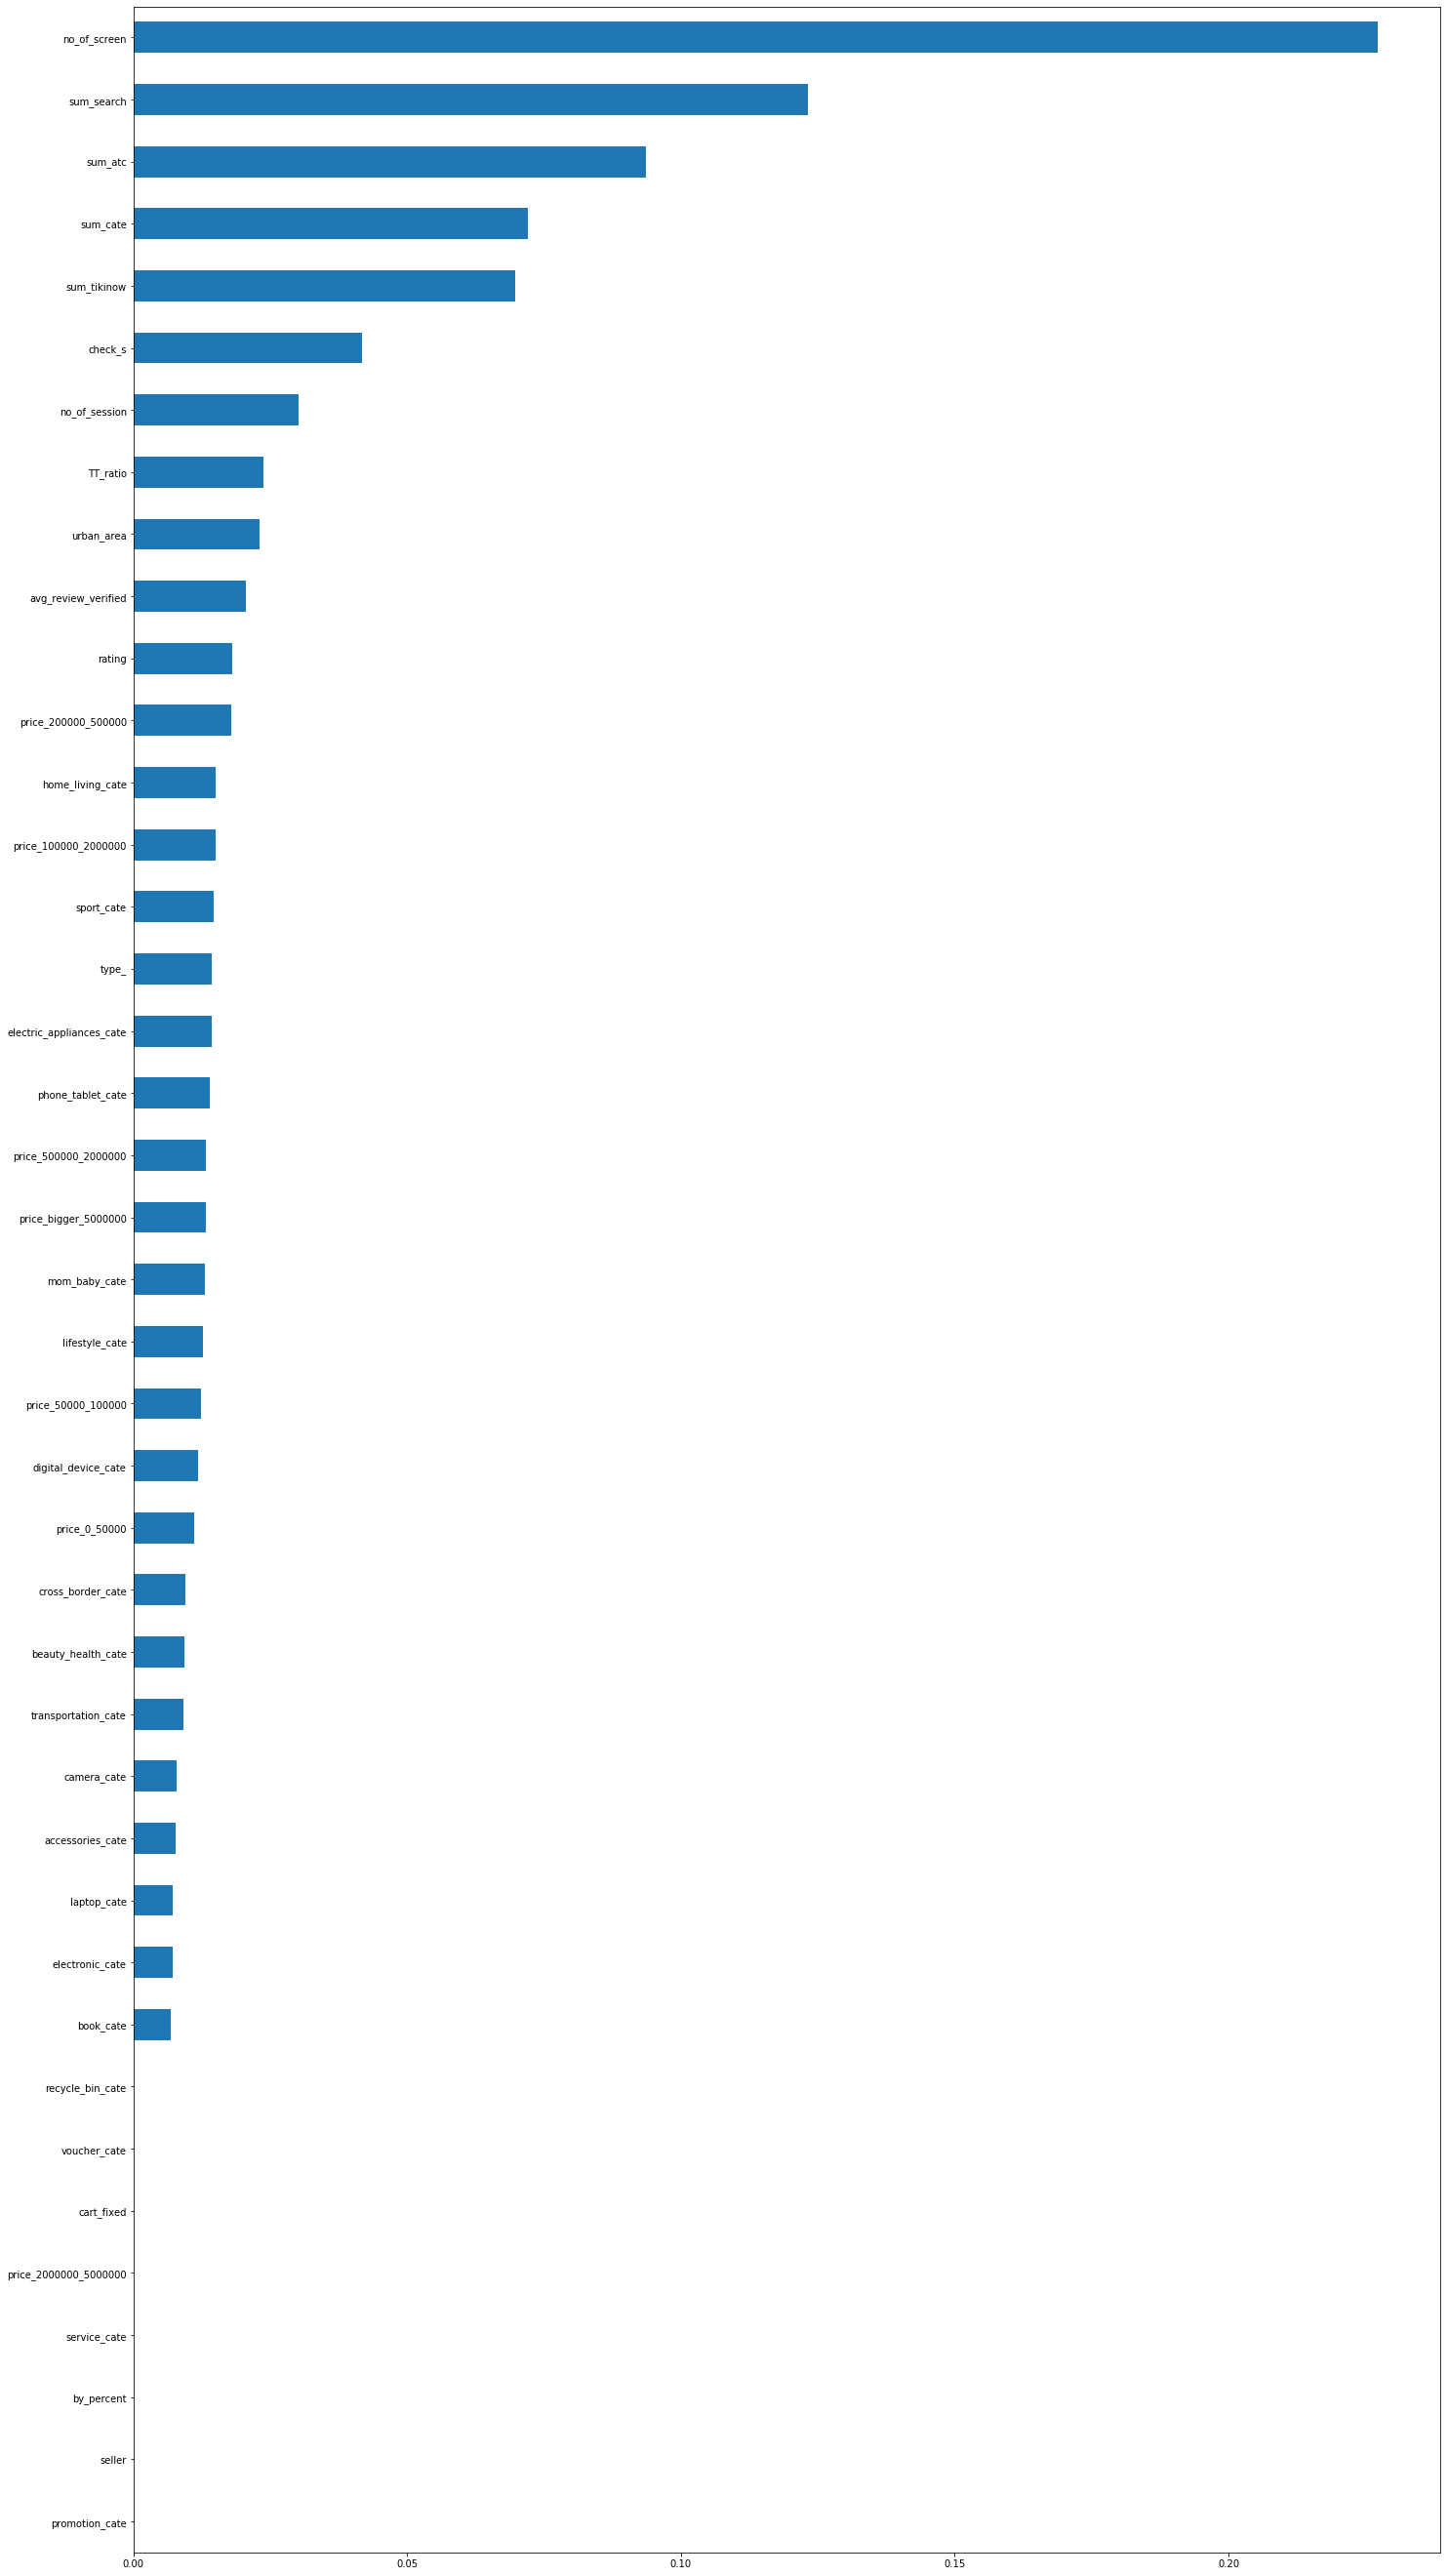

In [28]:
feat_importances = pd.Series(xgb.feature_importances_, index=df_temp.drop(columns=['user_label']).columns)
plt.figure(figsize=(24, 48))
feat_importances.sort_values().plot(kind='barh',)

[[5013   92]
 [1557  110]]


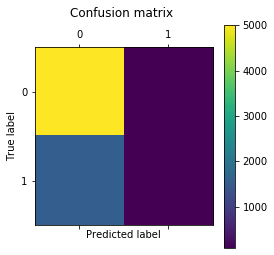

In [29]:
from sklearn.metrics import classification_report,confusion_matrix
# from scikitplot import plot_confusion_matrix
cm = confusion_matrix(temp_y_test, x_tmp_y_pred)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix \n')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [30]:
print(classification_report(temp_y_test, x_tmp_y_pred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      5105
           1       0.54      0.07      0.12      1667

    accuracy                           0.76      6772
   macro avg       0.65      0.52      0.49      6772
weighted avg       0.71      0.76      0.68      6772



In [31]:
from sklearn.metrics import roc_auc_score
xgb_score = xgb.predict_proba(temp_X_test)
auc_score = roc_auc_score(temp_y_test, xgb_score[:, 1])

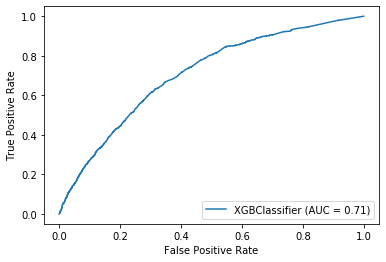

In [32]:
from sklearn import metrics
xgb_dis = metrics.plot_roc_curve(xgb, temp_X_test, temp_y_test)

In [33]:
from sklearn.model_selection import cross_val_score
cr_val_score = cross_val_score(xgb_model, temp_X_test, temp_y_test, cv=10)
print("Accuracy: {:0.5f} +/- {:0.5f}".format(cr_val_score.mean(),cr_val_score.std()*2))

Accuracy: 0.75340 +/- 0.00971


In [34]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [35]:
# from sklearn.model_selection import GridSearchCV, StratifiedKFold

# n_estimators = [50, 100, 150, 200]
# max_depth = [2, 4, 6, 8]
# param_grid = dict(n_estimators = n_estimators, max_depth=max_depth)
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

# grid_search = GridSearchCV(xgb_model, param_grid ,scoring='neg_log_loss', n_jobs=-1, cv=kfold, verbose=1)
# grid_result = grid_search.fit(temp_X_train, temp_y_train)
# print("Model with best score of {:0.4f} and best params of {}".format(grid_result.best_score_, grid_result.best_params_))

In [36]:
# def evaluate(model, X_test, y_test):
#     prediction = model.predict(X_test)
#     acc = accuracy_score(y_test, prediction)
#     return acc

In [37]:
# best_grid = grid_result.best_estimator_
# base_accuracy = evaluate(xgb_model, temp_X_test, temp_y_test)
# grid_accuracy = evaluate(best_grid, temp_X_test, temp_y_test)
# print('Improvement: {:0.2f}%'.format(100*(grid_accuracy - base_accuracy)))

In [38]:
# grid_accuracy

In [39]:
df_converted.head()

,no_of_screen,no_of_session,sum_atc,transportation_cate,beauty_health_cate,home_living_cate,accessories_cate,voucher_cate,electronic_cate,book_cate,phone_tablet_cate,service_cate,lifestyle_cate,digital_device_cate,sport_cate,cross_border_cate,laptop_cate,camera_cate,mom_baby_cate,recycle_bin_cate,electric_appliances_cate,promotion_cate,sum_cate,by_percent,cart_fixed,urban_area,sum_search,check_s,seller,price_100000_2000000,price_0_50000,price_200000_500000,price_50000_100000,price_500000_2000000,price_2000000_5000000,price_bigger_5000000,sum_tikinow,avg_review_verified,rating,type_,user_label,TT_ratio
deviceID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4636682665238544587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0
8458625958591689121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0
4804175510630396798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0
3600819940233407636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0
5510559891221180579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0


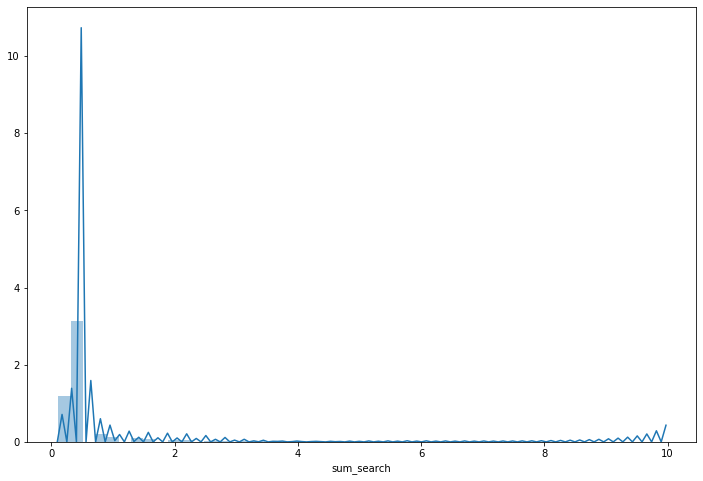

In [40]:
plt.figure(figsize=(12,8))
temp = outlier['sum_search'][outlier['sum_search'] < 10]
# temp
sns.distplot(temp)

In [41]:
dt.fit(con_X_train, con_y_train)
# use decisiontree
con_y_pred = dt.predict(con_X_test)
accuracy_score(con_y_test, con_y_pred)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').